In [1]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

In [ ]:
clinic_df = pd.read_csv("/content/drive/MyDrive/Signal_Data/KINZ/ClinicalData80.csv")
kinz_df = pd.read_csv("/content/drive/MyDrive/Signal_Data/KINZ/kinzData_panda_2024-05-06_12-24PM.csv")

In [ ]:
clinic_df

,RecordID,Age,Sex,Ethnicity,Race,ZipCode,SmokingStatus,PackyearSmokingHistory,AlcoholUse,FrequencyInPastWeekOfDrinks,...,Complication3Description,Complication4Type,Complication4ClavienDindoAssessmentGrade,Complication4Description,Complication5Type,Complication5ClavienDindoAssessmentGrade,Complication5Description,ComprehensiveComplicationIndexScore,AdditionalNotes,Complete6
0,001-LO,43,Female,Not Hispanic or Latino,White,NaN,No,NaN,No,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Complete
1,002-RJ,77,Female,Not Hispanic or Latino,Black or African American,NaN,No,NaN,No,NaN,...,Numbness in fingers,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,Complete
2,003-RM,48,Male,Hispanic or Latino,White,NaN,Past,3,No,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.7,NaN,Complete
3,004-MF,54,Female,Hispanic or Latino,White,NaN,Past,1,No,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Complete
4,005-GP,46,Male,Hispanic or Latino,White,NaN,No,NaN,No,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Complete
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,076-AH,60,Male,Not Hispanic or Latino,Black or African American,11236.0,Past,NaN,No,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Incomplete
75,077-SK,79,Male,Not Hispanic or Latino,White,12572.0,Past,25.00,Yes,3.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Incomplete
76,078-SM,81,Male,Not Hispanic or Latino,White,11516.0,Past,30.00,Yes,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Incomplete
77,079-KO,78,Female,Not Hispanic or Latino,White,11372.0,No,NaN,Yes,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Incomplete


In [ ]:

clinic_df["TotalFFIScore"].value_counts()

TotalFFIScore
1.0    29
0.0    24
2.0    15
3.0     8
4.0     2
Name: count, dtype: int64

In [ ]:
#0 for robust and 1 for frail

clinic_df["TotalFFIScore"] = clinic_df["TotalFFIScore"].replace({0.0: 0,
                                                                 1.0: 1,
                                                                 2.0: 1,
                                                                 3.0: 1,
                                                                 4.0: 1,})

In [ ]:
import pandas as pd


columns = kinz_df.columns.tolist()


body_parts = set(part[:-2] for part in columns if part.endswith(('_X', '_Y', '_Z')))
sorted_parts = sorted(body_parts)
new_columns = ['patientID', 'trial_num', 'walking_speed', 'timeStamps']  # Start with these fixed columns
for part in sorted_parts:

    for coord in ['_X', '_Y', '_Z']:
        new_columns.append(part + coord)
kinz_df = kinz_df[new_columns]


In [ ]:
kinz_df

,patientID,trial_num,walking_speed,timeStamps,ANKLE_LEFT_X,ANKLE_LEFT_Y,ANKLE_LEFT_Z,ANKLE_RIGHT_X,ANKLE_RIGHT_Y,ANKLE_RIGHT_Z,...,THUMB_LEFT_Z,THUMB_RIGHT_X,THUMB_RIGHT_Y,THUMB_RIGHT_Z,WRIST_LEFT_X,WRIST_LEFT_Y,WRIST_LEFT_Z,WRIST_RIGHT_X,WRIST_RIGHT_Y,WRIST_RIGHT_Z
0,001-LO,1,Regular,0.000000,390.562805,602.859009,1100.335571,463.011200,632.787964,861.115906,...,1145.996216,564.766174,145.974594,1083.058838,413.098236,-4.848353,1048.260864,591.701233,95.389412,988.159851
1,001-LO,1,Regular,0.031953,450.613678,627.286072,1276.520630,482.768677,654.531128,785.082581,...,1157.933228,592.330017,131.384872,1081.694458,424.203186,53.901688,1039.679077,686.942322,95.910889,1071.759644
2,001-LO,1,Regular,0.064029,431.553619,644.666809,1368.638550,522.916382,679.347290,774.065186,...,1171.173462,639.781372,103.950005,1087.459351,422.456421,73.186546,1057.114258,746.073425,74.025307,1121.079712
3,001-LO,1,Regular,0.239935,461.244110,659.211304,1528.767090,644.572632,682.580811,1240.194946,...,1209.790894,718.639771,154.724213,1271.734253,299.355225,68.522301,1184.870972,770.750427,55.768864,1316.004639
4,001-LO,1,Regular,0.271985,462.041687,661.941528,1535.726196,636.041260,666.786926,1293.354126,...,1285.507080,745.663025,155.708374,1342.324951,269.003235,46.742737,1239.554077,784.686951,50.482513,1371.748047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36978,080-TW,4,Fast,6.672006,0.126880,446.535370,1090.030762,-175.127060,434.097626,1092.649170,...,875.477295,-302.459106,-167.914749,858.258667,195.830185,-223.843414,788.262939,-371.584137,-232.415070,762.661682
36979,080-TW,4,Fast,6.704002,0.966503,431.704987,1087.463257,-165.724731,431.496918,1075.524658,...,856.007202,-308.187500,-176.329666,846.691711,194.798309,-232.748657,755.283325,-375.846252,-229.469437,745.169312
36980,080-TW,4,Fast,6.736022,37.078635,385.959290,1084.058466,-113.419082,393.683144,1083.271381,...,828.731496,-307.569259,-176.856063,843.140807,117.694591,-216.364935,737.265767,-350.738825,-215.533525,733.906983
36981,080-TW,4,Fast,6.768004,73.147911,340.267883,1080.657715,-61.175507,355.914246,1091.008911,...,801.488159,-306.951752,-177.381836,839.594116,40.682377,-200.000656,719.269592,-325.661194,-201.614151,722.658020


In [ ]:
list(kinz_df.columns)

['patientID',
 'trial_num',
 'walking_speed',
 'timeStamps',
 'ANKLE_LEFT_X',
 'ANKLE_LEFT_Y',
 'ANKLE_LEFT_Z',
 'ANKLE_RIGHT_X',
 'ANKLE_RIGHT_Y',
 'ANKLE_RIGHT_Z',
 'CLAVICLE_LEFT_X',
 'CLAVICLE_LEFT_Y',
 'CLAVICLE_LEFT_Z',
 'CLAVICLE_RIGHT_X',
 'CLAVICLE_RIGHT_Y',
 'CLAVICLE_RIGHT_Z',
 'EAR_LEFT_X',
 'EAR_LEFT_Y',
 'EAR_LEFT_Z',
 'EAR_RIGHT_X',
 'EAR_RIGHT_Y',
 'EAR_RIGHT_Z',
 'ELBOW_LEFT_X',
 'ELBOW_LEFT_Y',
 'ELBOW_LEFT_Z',
 'ELBOW_RIGHT_X',
 'ELBOW_RIGHT_Y',
 'ELBOW_RIGHT_Z',
 'EYE_LEFT_X',
 'EYE_LEFT_Y',
 'EYE_LEFT_Z',
 'EYE_RIGHT_X',
 'EYE_RIGHT_Y',
 'EYE_RIGHT_Z',
 'FOOT_LEFT_X',
 'FOOT_LEFT_Y',
 'FOOT_LEFT_Z',
 'FOOT_RIGHT_X',
 'FOOT_RIGHT_Y',
 'FOOT_RIGHT_Z',
 'HANDTIP_LEFT_X',
 'HANDTIP_LEFT_Y',
 'HANDTIP_LEFT_Z',
 'HANDTIP_RIGHT_X',
 'HANDTIP_RIGHT_Y',
 'HANDTIP_RIGHT_Z',
 'HAND_LEFT_X',
 'HAND_LEFT_Y',
 'HAND_LEFT_Z',
 'HAND_RIGHT_X',
 'HAND_RIGHT_Y',
 'HAND_RIGHT_Z',
 'HEAD_X',
 'HEAD_Y',
 'HEAD_Z',
 'HIP_LEFT_X',
 'HIP_LEFT_Y',
 'HIP_LEFT_Z',
 'HIP_RIGHT_X',
 'HIP_RIGHT

In [ ]:
kinz_df.shape

(36983, 100)

# Concatenation

In [ ]:
target = "TotalFFIScore"

In [ ]:
import numpy as np
from tqdm import tqdm


kinz_np = kinz_df.values # converting to np array

new_kinz = []
not_found_sub = []




for i in tqdm(kinz_np):

  # some RecordId name formate is not matching with the main data file....So we have to re formate the name
  sep = i[0].split("-")
  if sep[0].isdigit():
    sub = i[0]
  else:
    sub  = sep[-1]+"-"+sep[0]

  #quearing the TotalFFIScore
  total_ffi_score = clinic_df[clinic_df["RecordID"]==sub][target]

  # Check if total_ffi_score is not empty
  if not total_ffi_score.empty:
    new_row = np.append(i, total_ffi_score.iloc[0])
  else:
    not_found_sub.append(i[0])
    new_row = np.append(i, 'nan')  # Append 'nan' for missing values
    #print("Loop broke!!!")

  new_kinz.append(new_row)




kinz_np = np.array(new_kinz)

100%|██████████| 36983/36983 [00:22<00:00, 1658.14it/s]


In [ ]:
set(not_found_sub)

{'015-GE',
 '021-GA',
 '056-STs',
 '064-JH',
 '065-RC',
 '066-SC',
 '076-TH',
 '080-TW',
 'ss'}

In [ ]:
"""
sub
clinic_df[clinic_df["RecordID"]=="GE-015"]["TotalFFIScore"]
"""

'\nsub\nclinic_df[clinic_df["RecordID"]=="GE-015"]["TotalFFIScore"]\n'

# Removing NaN

In [ ]:


# Create a mask for rows containing NaN values
mask = np.any(kinz_np == 'nan', axis=1)

# Use the mask to select only the rows without NaN values
kinz_np = kinz_np[~mask]

np.where(kinz_np == 'nan')

(array([], dtype=int64), array([], dtype=int64))

In [ ]:
kinz_np.shape

(32727, 101)

# Dfined Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


def np_val_count(data,col):
  last_elements = data[:, col]
  value_counts = np.unique(last_elements, return_counts=True)
  for value, count in zip(*value_counts):
      print(f"Value: {value}, Count: {count}")



col_code={
    "Prediction":'#003BCC',
    "Ground Truth":'#CC0900',
    "Nominal Model":'#117A65'
}



def pred_vs_act(pred,act):
  # plot BIS
  plt.figure(figsize=(10, 6))
  plt.plot(pred,label='Prediction',color=col_code['Prediction'])
  plt.plot(act,label='Ground Truth',color=col_code['Ground Truth'])


  plt.xlabel('Time (min)')
  plt.ylabel('BIS')
  plt.title('BIS')
  plt.legend()
  plt.show()




import matplotlib.pyplot as plt
def history_plot(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(1, len(acc) + 1)

  # Plot training and validation accuracy
  plt.figure(figsize=(12, 5))
  plt.subplot(1, 2, 1)
  plt.plot(epochs, acc, 'r', label='Training accuracy')
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
  plt.title('Training and Validation Accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()

  # Plot training and validation loss
  plt.subplot(1, 2, 2)
  plt.plot(epochs, loss, 'r', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and Validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()

  plt.tight_layout()
  plt.show()


def np_Query(data,col_index,value):
  condition = data[:, col_index] == value
  indices = np.where(condition)[0]
  return kinz_np[indices]







from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

def eval_mat(model):
    # Make predictions
    y_pred = model.predict(X_val)
    y_pred_classes = np.argmax(y_pred, axis=1)


    # Confusion Matrix
    cm = confusion_matrix(y_val, y_pred_classes)
    print("Confusion Matrix:")
    print(cm)

    # Classification Report (Precision, Recall, F1-score)
    print("\nClassification Report:")
    print(classification_report(y_val, y_pred_classes))

    # Calculate Accuracy
    accuracy = accuracy_score(y_val, y_pred_classes)
    print(f"Accuracy: {accuracy*100:.2f}%")


# Selecting `Fast` for walking speed

In [ ]:
kinz_np = np_Query(kinz_np,2,'Fast')
kinz_np

array([['001-LO', 3, 'Fast', ..., 120.7342300415039, 1084.9300537109375,
        1.0],
       ['001-LO', 3, 'Fast', ..., -50.20004653930664, 1345.118896484375,
        1.0],
       ['001-LO', 3, 'Fast', ..., -23.14031219482422, 1365.506591796875,
        1.0],
       ...,
       ['079-KO', 4, 'Fast', ..., -183.87863159179688, 862.876953125,
        1.0],
       ['079-KO', 4, 'Fast', ..., -177.07972717285156, 834.868408203125,
        1.0],
       ['079-KO', 4, 'Fast', ..., -165.88893127441406, 776.75, 1.0]],
      dtype=object)

# Spliting

In [ ]:

X_train  = kinz_np[:,4:-1].astype(np.float64)
y_train = kinz_np[:,-1].astype(np.float64)

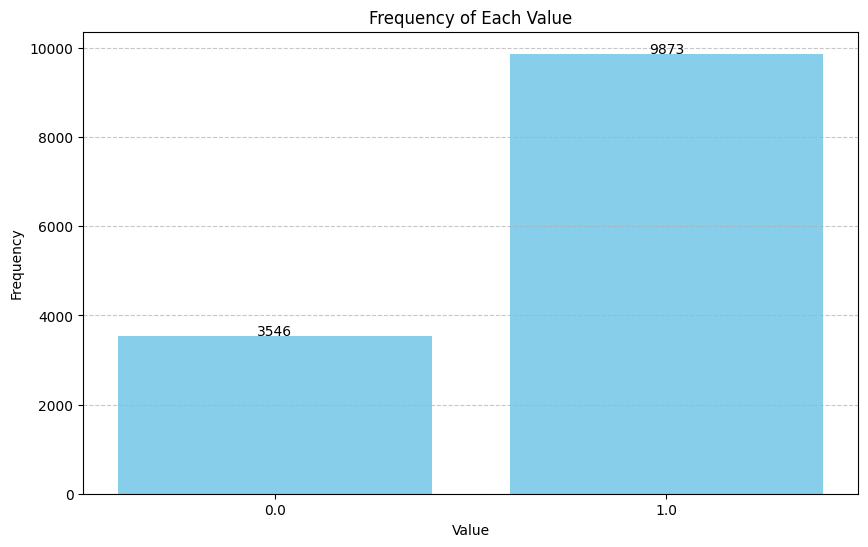

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


series = pd.Series(y_train)

# Get value counts
value_counts = series.value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(value_counts.index.astype(str), value_counts.values, color='skyblue')
plt.title('Frequency of Each Value')
plt.xlabel('Value')
plt.ylabel('Frequency')
#plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding text labels on the bars
for index, value in enumerate(value_counts.values):
    plt.text(x=index, y=value + 1, s=f"{value}", ha='center')  # Adjust positioning as needed

plt.show()

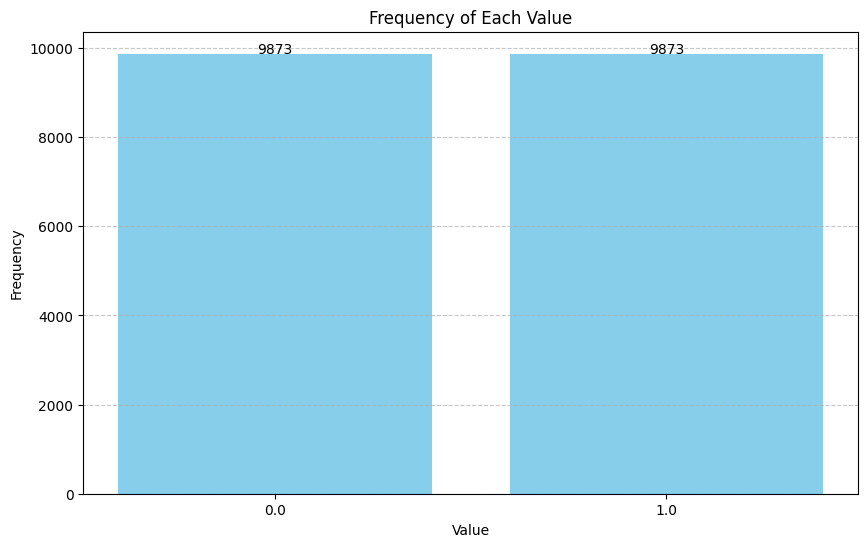

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)






series = pd.Series(y_train)

# Get value counts
value_counts = series.value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(value_counts.index.astype(str), value_counts.values, color='skyblue')
plt.title('Frequency of Each Value')
plt.xlabel('Value')
plt.ylabel('Frequency')
#plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding text labels on the bars
for index, value in enumerate(value_counts.values):
    plt.text(x=index, y=value + 1, s=f"{value}", ha='center')  # Adjust positioning as needed

plt.show()

# Converting axis - x,y,z into single feature

In [ ]:
X_train = X_train.reshape(X_train.shape[0], -1, 3)

In [ ]:
n_timesteps = X_train.shape[1]
n_features = X_train.shape[2]

In [ ]:
X_train.shape

(19746, 32, 3)

In [ ]:
EPOCH,BATCH = 200,10

## 3. CNN-LSTM Hybrid Model

Restoring model weights from the end of the best epoch: 16.
Epoch 19: early stopping


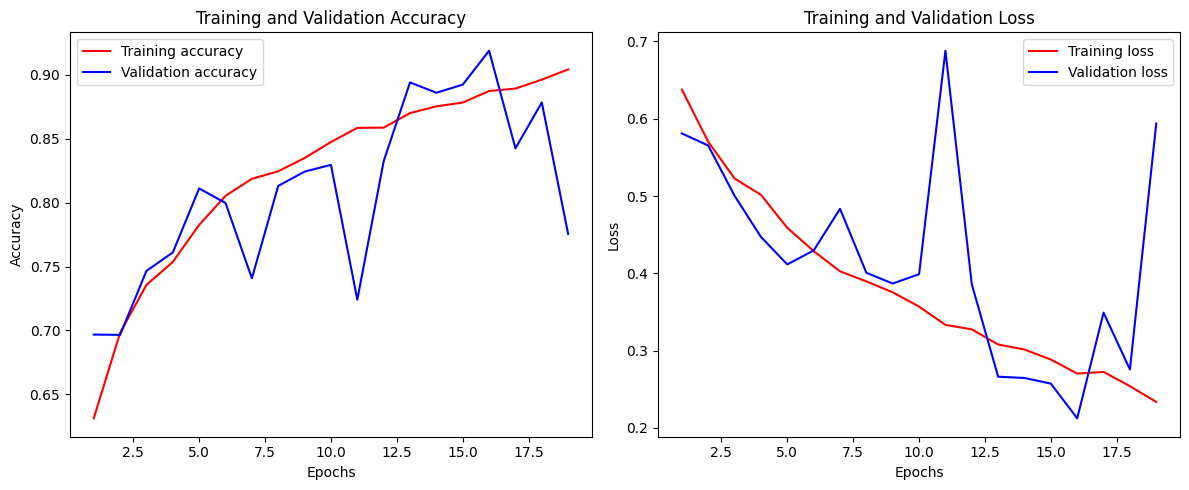

Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x7bdaa19696c0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x7bdaa19696c0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
124/124 [==============================] - 2s 6ms/step
Fold accuracy: 0.9189873417721519
Fold precision: 0.9325666492420283
Fold recall: 0.9032911392405063
Fold F1 score: 0.9176954732510287
Fold confusion matrix:
[[1846  129]
 [ 191 1784]]

Restoring model weights from the end of the best epoch: 23.
Epoch 26: early stopping


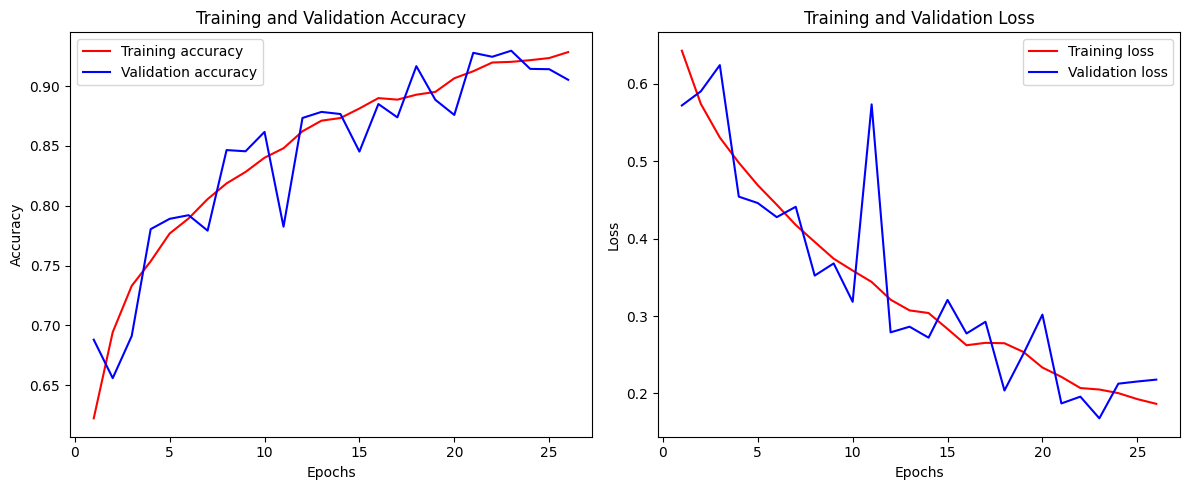

Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x7bdaa182cee0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x7bdaa182cee0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
124/124 [==============================] - 2s 9ms/step
Fold accuracy: 0.9296024309951887
Fold precision: 0.9194265941670786
Fold recall: 0.9417721518987342
Fold F1 score: 0.9304652326163082
Fold confusion matrix:
[[1811  163]
 [ 115 1860]]

Restoring model weights from the end of the best epoch: 12.
Epoch 15: early stopping


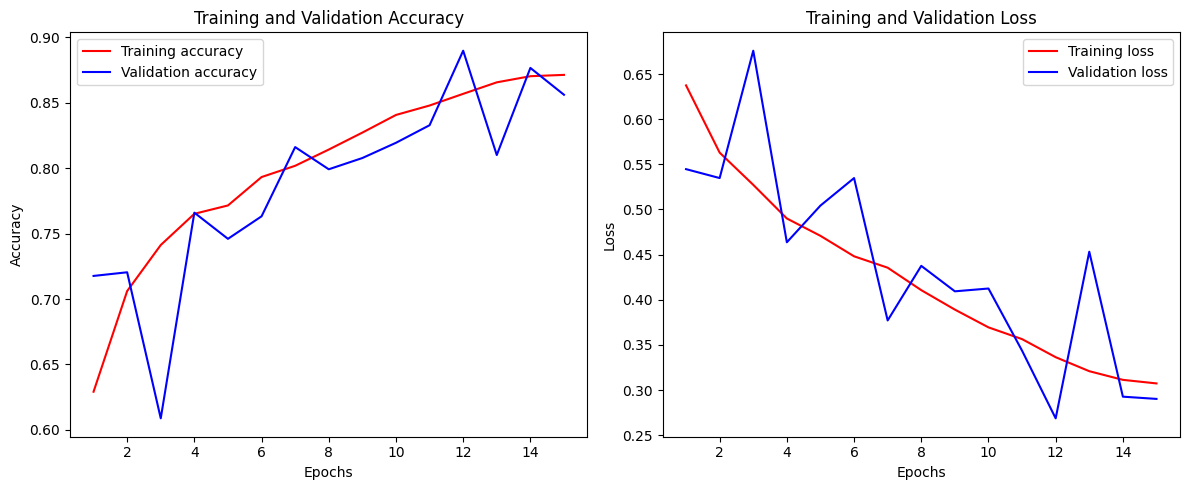

Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x7bdaa0395120>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x7bdaa0395120>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
124/124 [==============================] - 2s 6ms/step
Fold accuracy: 0.8898455305140542
Fold precision: 0.9061181434599156
Fold recall: 0.8698734177215189
Fold F1 score: 0.8876259364505296
Fold confusion matrix:
[[1796  178]
 [ 257 1718]]

Restoring model weights from the end of the best epoch: 20.
Epoch 23: early stopping


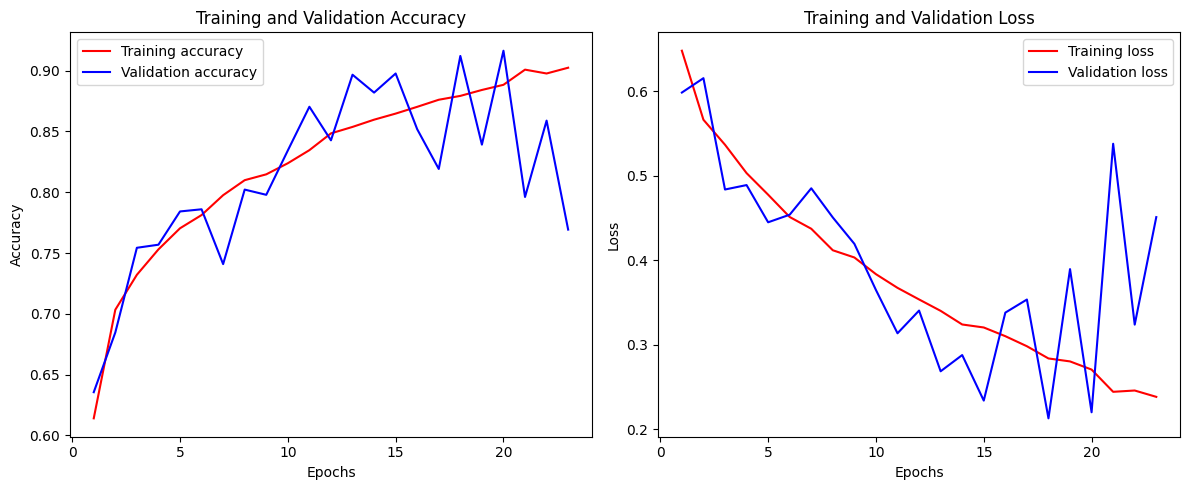

Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x7bda955a4af0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x7bda955a4af0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
124/124 [==============================] - 2s 7ms/step
Fold accuracy: 0.9164345403899722
Fold precision: 0.928125
Fold recall: 0.9027355623100304
Fold F1 score: 0.9152542372881355
Fold confusion matrix:
[[1837  138]
 [ 192 1782]]

Restoring model weights from the end of the best epoch: 19.
Epoch 22: early stopping


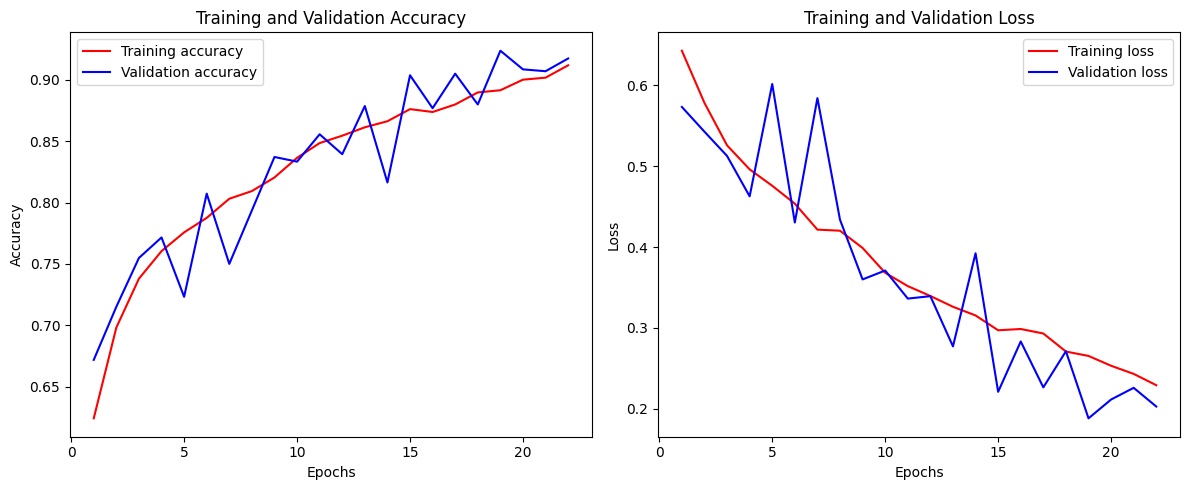

Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x7bda9e577ac0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x7bda9e577ac0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
124/124 [==============================] - 2s 7ms/step
Fold accuracy: 0.9237781716890352
Fold precision: 0.9218356026222895
Fold recall: 0.9260385005065856
Fold F1 score: 0.9239322719231741
Fold confusion matrix:
[[1820  155]
 [ 146 1828]]

Mean accuracy: 0.9157296030720804
Standard deviation of accuracy: 0.013699122757426956
Mean precision: 0.9216143978982624
Standard deviation of precision: 0.00902561984063441
Mean recall: 0.9087421

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, InputLayer, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Define a function to create the more complex CNN-LSTM model
def create_model(input_shape):
    model = Sequential([
        InputLayer(input_shape=input_shape),

        # First block of Conv1D + MaxPooling
        Conv1D(filters=64, kernel_size=3, activation='relu'),
        BatchNormalization(),
        MaxPooling1D(pool_size=2),

        # Second block of Conv1D + MaxPooling
        Conv1D(filters=128, kernel_size=3, activation='relu'),
        BatchNormalization(),
        MaxPooling1D(pool_size=2),

        # Third block of Conv1D + MaxPooling
        Conv1D(filters=256, kernel_size=3, activation='relu'),
        BatchNormalization(),
        MaxPooling1D(pool_size=2),

        # Adding more LSTM layers
        LSTM(100, return_sequences=True),
        LSTM(50),

        # Adding Dense layers with Dropout for regularization
        Dense(100, activation='relu'),
        Dropout(0.5),
        Dense(50, activation='relu'),
        Dropout(0.5),

        Dense(1, activation='sigmoid')  # Single neuron with sigmoid activation for binary classification
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

X = np.array(X_train)
y = np.array(y_train)

# Define cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store metrics for each fold
accuracies = []
precisions = []
recalls = []
f1s = []
confusion_matrices = []

# Perform cross-validation
for train_index, val_index in kfold.split(X, y):
    X_train_fold, X_val_fold = X[train_index], X[val_index]
    y_train_fold, y_val_fold = y[train_index], y[val_index]

    model = create_model(input_shape=(X.shape[1], X.shape[2]))

    early_stop = EarlyStopping(monitor='val_accuracy', patience=3, verbose=1, mode='max', restore_best_weights=True)

    history = model.fit(X_train_fold, y_train_fold, epochs=EPOCH, batch_size=BATCH, validation_data=(X_val_fold, y_val_fold), callbacks=[early_stop], verbose=0)
    history_plot(history)

    y_val_pred_prob = model.predict(X_val_fold)
    y_val_pred = (y_val_pred_prob > 0.5).astype("int32")

    acc = accuracy_score(y_val_fold, y_val_pred)
    precision = precision_score(y_val_fold, y_val_pred)
    recall = recall_score(y_val_fold, y_val_pred)
    f1 = f1_score(y_val_fold, y_val_pred)
    cm = confusion_matrix(y_val_fold, y_val_pred)

    accuracies.append(acc)
    precisions.append(precision)
    recalls.append(recall)
    f1s.append(f1)
    confusion_matrices.append(cm)

    print(f'Fold accuracy: {acc}')
    print(f'Fold precision: {precision}')
    print(f'Fold recall: {recall}')
    print(f'Fold F1 score: {f1}')
    print(f'Fold confusion matrix:\n{cm}\n')

print(f'Mean accuracy: {np.mean(accuracies)}')
print(f'Standard deviation of accuracy: {np.std(accuracies)}')
print(f'Mean precision: {np.mean(precisions)}')
print(f'Standard deviation of precision: {np.std(precisions)}')
print(f'Mean recall: {np.mean(recalls)}')
print(f'Standard deviation of recall: {np.std(recalls)}')
print(f'Mean F1 score: {np.mean(f1s)}')
print(f'Standard deviation of F1 score: {np.std(f1s)}')

# Aggregate confusion matrix
total_cm = np.sum(confusion_matrices, axis=0)
print(f'Aggregated confusion matrix:\n{total_cm}')


# Save the final model
model.save('final_cnn_lstm_model.h5')